In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/clean_stop_data.csv')

In [3]:
df.head()

,year,month,day,hour,citizen_race,citizen_gender,citizen_age,officer_race,officer_gender,division,beat,violation,frisked,searched,citation_issued,date,time,lat,lng
0,2015.0,1.0,1.0,22.0,white,male,53.0,Asian,female,6TH DIVISION,BEAT 1,FAIL OF NON-OWNER/OPER TO MAINTAIN REQ INS/SEC...,0,0,1,2015-01-01,22:39:00,38.210850,-85.740058
1,2015.0,1.0,2.0,16.0,white,male,NaN,Asian,female,6TH DIVISION,BEAT 5,NaN,0,0,1,2015-01-02,16:42:00,38.203829,-85.665319
2,2015.0,1.0,2.0,20.0,Black,female,NaN,Asian,female,6TH DIVISION,BEAT 5,NaN,0,0,0,2015-01-02,20:00:00,38.205311,-85.650115
3,2015.0,1.0,2.0,20.0,Black,male,24.0,Asian,female,6TH DIVISION,BEAT 5,OPERATING ON SUSPENDED/REVOKED OPERATORS LICEN...,0,1,1,2015-01-02,20:35:00,38.202592,-85.654212
4,2015.0,1.0,11.0,17.0,Black,male,24.0,Asian,female,6TH DIVISION,BEAT 2,NO OR EXPIRED REGISTRATION PLATES|FAILURE OF O...,0,0,1,2015-01-11,17:20:00,38.156730,-85.696997


In [4]:
overview = df.groupby('citizen_race').aggregate(np.sum)[['frisked', 'searched', 'citation_issued']]

In [5]:
stops = pd.Series(df.citizen_race.value_counts())
overview['stops'] = stops
overview = overview[['stops', 'searched', 'frisked', 'citation_issued']]
overview['pop'] = pd.Series({'Black': 171781, 'white': 546872, 'Native American': 1302, 'Asian': 22829, 'Latino': 45355})

In [6]:
overview['% ethnicity frisked'] = ((overview['frisked'] / overview['stops']) * 100).round(2)
overview['% ethnicity searched'] = ((overview['searched'] / overview['stops']) * 100).round(2)
overview['% ethnicity cited'] = ((overview['citation_issued'] / overview['stops']) * 100).round(2)
overview['% of population'] = ((overview['pop'] / 766000) * 100).round(2)
overview['% of all stops'] = ((overview['stops'] / df.year.count()) * 100).round(2)
overview['% of all searches'] = ((overview['searched'] / df.searched.sum()) * 100).round(2)
overview['% of all citations'] = ((overview['citation_issued'] / df.citation_issued.sum()) * 100).round(2)

In [7]:
overview

,stops,searched,frisked,citation_issued,pop,% ethnicity frisked,% ethnicity searched,% ethnicity cited,% of population,% of all stops,% of all searches,% of all citations
citizen_race,,,,,,,,,,,,
Asian,411,25,0,60,22829.0,0.00,6.08,14.60,2.98,0.37,0.36,0.07
Black,34943,3125,9,23494,171781.0,0.03,8.94,67.24,22.43,31.49,45.38,28.60
Latino,4843,254,0,3536,45355.0,0.00,5.24,73.01,5.92,4.36,3.69,4.30
Middle Eastern,444,38,0,57,NaN,0.00,8.56,12.84,NaN,0.40,0.55,0.07
Native American,65,2,0,50,1302.0,0.00,3.08,76.92,0.17,0.06,0.03,0.06
Unknown,2,0,0,2,NaN,0.00,0.00,100.00,NaN,0.00,0.00,0.00
white,69340,3435,7,54073,546872.0,0.01,4.95,77.98,71.39,62.49,49.88,65.81


In [ ]:
overview[]

In [9]:
pct_pop = [overview.loc['Asian', '% of population'], overview.loc['Black', '% of population'], overview.loc['Latino', '% of population'], overview.loc['white', '% of population']]
pct_all_stops = [overview.loc['Asian', '% of all stops'], overview.loc['Black', '% of all stops'], overview.loc['Latino', '% of all stops'], overview.loc['white', '% of all stops']]
pct_all_searches = [overview.loc['Asian', '% of all searches'], overview.loc['Black', '% of all searches'], overview.loc['Latino', '% of all searches'], overview.loc['white', '% of all searches']]             
pct_all_citations = [overview.loc['Asian', '% of all citations'], overview.loc['Black', '% of all citations'], overview.loc['Latino', '% of all citations'], overview.loc['white', '% of all citations']]

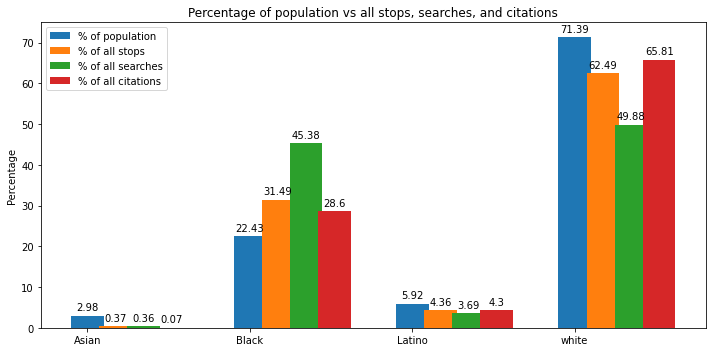

In [47]:
labels = ['Asian', 'Black', 'Latino', 'white']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
spacing = 0.52

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x, pct_pop, width, label='% of population')
rects2 = ax.bar(x + spacing/3, pct_all_stops, width, label='% of all stops')
rects3 = ax.bar(x + (2*spacing)/3, pct_all_searches, width, label='% of all searches')
rects4 = ax.bar(x + spacing, pct_all_citations, width, label='% of all citations')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of population vs all stops, searches, and citations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

#fig.tight_layout(w_pad=2)
fig.tight_layout()
plt.show()

In [67]:
overview.head(10)

,stops,searched,frisked,citation_issued,pop,% ethnicity frisked,% ethnicity searched,% ethnicity cited,% of population,% of all stops,% of all searches,% of all citations
citizen_race,,,,,,,,,,,,
Asian,411,25,0,60,22829.0,0.00,6.08,14.60,2.98,0.37,0.36,0.07
Black,34943,3125,9,23494,171781.0,0.03,8.94,67.24,22.43,31.49,45.38,28.60
Latino,4843,254,0,3536,45355.0,0.00,5.24,73.01,5.92,4.36,3.69,4.30
Middle Eastern,444,38,0,57,NaN,0.00,8.56,12.84,NaN,0.40,0.55,0.07
Native American,65,2,0,50,1302.0,0.00,3.08,76.92,0.17,0.06,0.03,0.06
Unknown,2,0,0,2,NaN,0.00,0.00,100.00,NaN,0.00,0.00,0.00
white,69340,3435,7,54073,546872.0,0.01,4.95,77.98,71.39,62.49,49.88,65.81


In [12]:
pct_ethnicity_searched = [overview.loc['Asian', '% ethnicity searched'], overview.loc['Black', '% ethnicity searched'], overview.loc['Latino', '% ethnicity searched'], overview.loc['white', '% ethnicity searched']]
pct_ethnicity_cited = [overview.loc['Asian', '% ethnicity cited'], overview.loc['Black', '% ethnicity cited'], overview.loc['Latino', '% ethnicity cited'], overview.loc['white', '% ethnicity cited']]

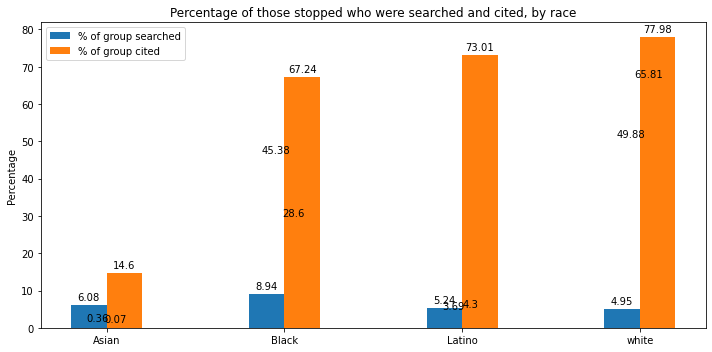

In [13]:
labels = ['Asian', 'Black', 'Latino', 'white']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, pct_ethnicity_searched, width, label='% of group searched')
rects2 = ax.bar(x + width/2, pct_ethnicity_cited, width, label='% of group cited')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of those stopped who were searched and cited, by race')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

#fig.tight_layout(w_pad=2)
fig.tight_layout()
plt.show()

In [14]:
overview_3 = df.groupby(['officer_race', 'citizen_race']).aggregate(np.sum)[['frisked', 'searched', 'citation_issued']]

In [15]:
overview_3['stops'] = df.groupby(['officer_race', 'citizen_race'])['year'].count()

In [16]:
overview_3['% frisked'] = overview_3['frisked'] / overview_3['stops']
overview_3['% searched'] = overview_3['searched'] / overview_3['stops']
overview_3['% cited'] = overview_3['citation_issued'] / overview_3['stops']

In [17]:
overview_3

frisked  searched  citation_issued  stops  \
officer_race citizen_race                                                 
Asian        Asian                  0         0                0      7   
             Black                  0        77              255    565   
             Latino                 0         8               37     74   
             Middle Eastern         0         0                0      2   
             white                  0        74              330    764   
Black        Asian                  0         1                3     46   
             Black                  2       383             5124   6733   
             Latino                 0        13              686    800   
             Middle Eastern         0         4                9     84   
             Native American        0         0               13     16   
             Unknown                0         0                1      1   
             white                  0       399            11919  13663   
Latino       Asian                  0         0                0     11   
             Black                  0        48               79    279   
             Latino                 0        10               20     54   
             Middle Eastern         0         1                1     11   
             white                  0        77              126    368   
Other        Black                  0         1                6     19   
             Latino                 0         0                0      2   
             Middle Eastern         0         0                0      1   
             white                  0         1                3     21   
white        Asian                  0        24               57    344   
             Black                  7      2605            18015  27285   
             Latino                 0       218             2793   3904   
             Middle Eastern         0        33               47    345   
             Native American        0         2               37     49   
             Unknown                0         0                1      1   
             white                  7      2878            41683  54446   

                              % frisked  % searched   % cited  
officer_race citizen_race                                      
Asian        Asian             0.000000    0.000000  0.000000  
             Black             0.000000    0.136283  0.451327  
             Latino            0.000000    0.108108  0.500000  
             Middle Eastern    0.000000    0.000000  0.000000  
             white             0.000000    0.096859  0.431937  
Black        Asian             0.000000    0.021739  0.065217  
             Black             0.000297    0.056884  0.761028  
             Latino            0.000000    0.016250  0.857500  
             Middle Eastern    0.000000    0.047619  0.107143  
             Native American   0.000000    0.000000  0.812500  
             Unknown           0.000000    0.000000  1.000000  
             white             0.000000    0.029203  0.872356  
Latino       Asian             0.000000    0.000000  0.000000  
             Black             0.000000    0.172043  0.283154  
             Latino            0.000000    0.185185  0.370370  
             Middle Eastern    0.000000    0.090909  0.090909  
             white             0.000000    0.209239  0.342391  
Other        Black             0.000000    0.052632  0.315789  
             Latino            0.000000    0.000000  0.000000  
             Middle Eastern    0.000000    0.000000  0.000000  
             white             0.000000    0.047619  0.142857  
white        Asian             0.000000    0.069767  0.165698  
             Black             0.000257    0.095474  0.660253  
             Latino            0.000000    0.055840  0.715420  
             Middle Eastern    0.000000    0.095652  0.136232  
             Native American   0.000000    0.040816

In [18]:
Asian_officer_pct_search = (overview_3.loc['Asian', '% searched'] * 100).round(2)
Black_officer_pct_search = (overview_3.loc['Black', '% searched'] * 100).round(2)
Latino_officer_pct_search = (overview_3.loc['Latino', '% searched'] * 100).round(2)
white_officer_pct_search = (overview_3.loc['white', '% searched'] * 100).round(2)

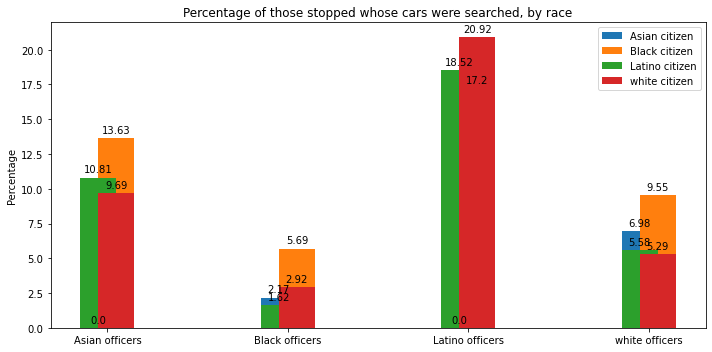

In [19]:
labels = ['Asian officers', 'Black officers', 'Latino officers', 'white officers']
Asian = [Asian_officer_pct_search[0], Black_officer_pct_search[0], Latino_officer_pct_search[0], white_officer_pct_search[0]]
Black = [Asian_officer_pct_search[1], Black_officer_pct_search[1], Latino_officer_pct_search[1], white_officer_pct_search[1]]
Latino = [Asian_officer_pct_search[2], Black_officer_pct_search[2], Latino_officer_pct_search[2], white_officer_pct_search[2]]
white = [Asian_officer_pct_search[4], Black_officer_pct_search[6], Latino_officer_pct_search[4], white_officer_pct_search[6]]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/4, Asian, width, label='Asian citizen')
rects2 = ax.bar(x + width/4, Black, width, label='Black citizen')
rects3 = ax.bar(x - width/4, Latino, width, label='Latino citizen')
rects4 = ax.bar(x + width/4, white, width, label='white citizen')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of those stopped whose cars were searched, by race')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

#fig.tight_layout(w_pad=2)
fig.tight_layout()
plt.show()

In [20]:
Asian_officer_pct_cited = (overview_3.loc['Asian', '% cited'] * 100).round(2)
Black_officer_pct_cited = (overview_3.loc['Black', '% cited'] * 100).round(2)
Latino_officer_pct_cited = (overview_3.loc['Latino', '% cited'] * 100).round(2)
white_officer_pct_cited = (overview_3.loc['white', '% cited'] * 100).round(2)

In [21]:
[Asian_officer_pct_cited[0], Black_officer_pct_cited[0], Latino_officer_pct_cited[0], white_officer_pct_cited[0]]

[0.0, 6.52, 0.0, 16.57]

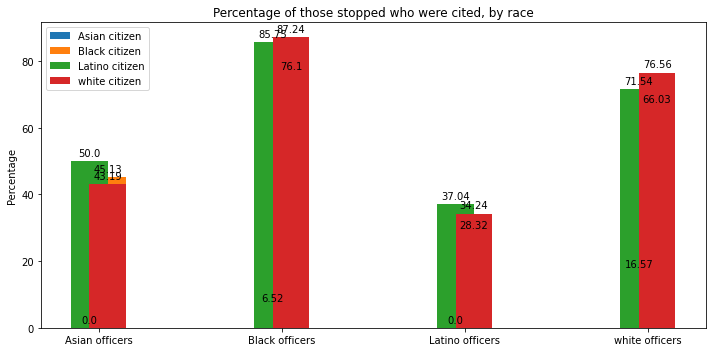

In [22]:
labels = ['Asian officers', 'Black officers', 'Latino officers', 'white officers']
Asian = [Asian_officer_pct_cited[0], Black_officer_pct_cited[0], Latino_officer_pct_cited[0], white_officer_pct_cited[0]]
Black = [Asian_officer_pct_cited[1], Black_officer_pct_cited[1], Latino_officer_pct_cited[1], white_officer_pct_cited[1]]
Latino = [Asian_officer_pct_cited[2], Black_officer_pct_cited[2], Latino_officer_pct_cited[2], white_officer_pct_cited[2]]
white = [Asian_officer_pct_cited[4], Black_officer_pct_cited[6], Latino_officer_pct_cited[4], white_officer_pct_cited[6]]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/4, Asian, width, label='Asian citizen')
rects2 = ax.bar(x + width/4, Black, width, label='Black citizen')
rects3 = ax.bar(x - width/4, Latino, width, label='Latino citizen')
rects4 = ax.bar(x + width/4, white, width, label='white citizen')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of those stopped who were cited, by race')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

#fig.tight_layout(w_pad=2)
fig.tight_layout()
plt.show()

In [24]:
df.head()

,year,month,day,hour,citizen_race,citizen_gender,citizen_age,officer_race,officer_gender,division,beat,violation,frisked,searched,citation_issued,date,time,lat,lng
0,2015.0,1.0,1.0,22.0,white,male,53.0,Asian,female,6TH DIVISION,BEAT 1,FAIL OF NON-OWNER/OPER TO MAINTAIN REQ INS/SEC...,0,0,1,2015-01-01,22:39:00,38.210850,-85.740058
1,2015.0,1.0,2.0,16.0,white,male,NaN,Asian,female,6TH DIVISION,BEAT 5,NaN,0,0,1,2015-01-02,16:42:00,38.203829,-85.665319
2,2015.0,1.0,2.0,20.0,Black,female,NaN,Asian,female,6TH DIVISION,BEAT 5,NaN,0,0,0,2015-01-02,20:00:00,38.205311,-85.650115
3,2015.0,1.0,2.0,20.0,Black,male,24.0,Asian,female,6TH DIVISION,BEAT 5,OPERATING ON SUSPENDED/REVOKED OPERATORS LICEN...,0,1,1,2015-01-02,20:35:00,38.202592,-85.654212
4,2015.0,1.0,11.0,17.0,Black,male,24.0,Asian,female,6TH DIVISION,BEAT 2,NO OR EXPIRED REGISTRATION PLATES|FAILURE OF O...,0,0,1,2015-01-11,17:20:00,38.156730,-85.696997


## Start Bayesian Testing

#### the beta distribution models the probability of being searched:

* a = 1 + number of successes (searches)
* b = 1 + number of misses (non searches)
* a + b = 2 + number of stops
* mean of beta = a / (a + b) -->> a + b = stops (roughly)
* p of search = a / (a + b) 

#### from probability to relative likelihood

* y-axis of pdf is probability density
* x-axis of pdf is probabilities (search rates)
* -->> relative probability of being searched
 

In [119]:
def plot_beta(alpha, beta, ax, search_samples, title=None, label=None):

    # Build a beta distribtuion scipy object.
    dist = stats.beta(alpha, beta)

    # The support (always this for the beta dist).
    x = np.linspace(0.0, 1.0, len(search_samples)) # ? 

    # The probability density at each sample support value.
    y = dist.pdf(x)

    # Plot it all.
    lines = ax.plot(x, y, label=label)
    ax.fill_between(x, y, alpha=0.2, color=lines[0].get_c())
    if title: 
        ax.set_title(title)
    ax.get_yaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([np.max(y)])
#    ax.get_xaxis().set_ticks(xticks)
    ax.set_ylim(0.0, np.max(y)*1.2)

def get_beta_dist_params(search_samples):
    search_samples = np.array(search_samples)
    num_searches = search_samples.sum()
    total_stops = len(search_samples)
    alpha = num_searches + 1
    beta = (total_stops - num_searches) + 1
    mean = 1 * num_searches / total_stops
    return alpha, beta, mean, num_searches, total_stops


def plot_beta_website(search_samples, ax, label=None):
    alpha, beta, mean, num_searches, total_stops = get_beta_dist_params(search_samples)
    title = None if label else r"Searched {}/{}".format(num_searches, total_stops)
    plot_beta(alpha, beta, ax, search_samples, title, label)
    ax.set_xlabel("Search Rate")
    ax.set_ylabel("Probability Density")

In [72]:
Black_searches = df.loc[(df.citizen_race == 'Black') & (df.searched.isin([0,1]))]
Black_searches = Black_searches['searched']
len(Black_searches)

34943

In [73]:
white_searches = df.loc[(df.citizen_race == 'white') & (df.searched.isin([0,1]))]
white_searches = white_searches['searched']
len(white_searches)

69340

In [112]:
n = 200
Black_samples = Black_searches[:n]
white_samples = white_searches[:n]

np.mean(Black_samples), np.mean(white_samples)

(0.14, 0.125)

In [116]:
Black_searches.shape

(34943,)

In [80]:
np.mean(Black_searches), np.mean(white_searches)

(0.08943135964284692, 0.049538505912892994)

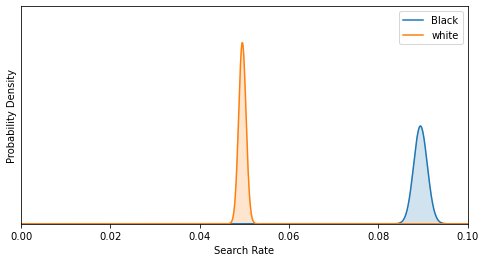

In [124]:
# plot our 'belief' about each race's chance of being searched

fig, ax = plt.subplots(1, 1, figsize=(8, 4))


plot_beta_website(Black_searches, ax, label="Black")
plot_beta_website(white_searches, ax, label="white")
ax.legend()
ax.set_xlim(0,0.1);

### Calculating probability that Blacks more likely to get searched

In [103]:
num_simulations = 100_000

alpha, beta = get_beta_dist_params(Black_samples)[:2]
print(alpha, beta)
dist_A = stats.beta(alpha, beta)

alpha, beta = get_beta_dist_params(white_samples)[:2]
print(alpha, beta)
dist_B = stats.beta(alpha, beta)

simulated_A = dist_A.rvs(num_simulations)
simulated_B = dist_B.rvs(num_simulations)

print((simulated_A > simulated_B).mean())
#print((simulated_B > simulated_A).mean())

3126 31819
3436 65906
1.0


### 100 % of the time Blacks are more likely to be searched than whites (?)

### 95% credible interval of Black motorists' rate of search

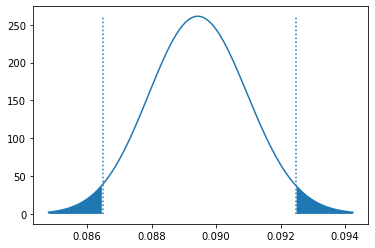

In [125]:
x = np.linspace(*dist_A.ppf([.001, .999]),201)
plt.plot(x, dist_A.pdf(x))
plt.vlines(dist_A.ppf([.025, .975]), ymin = 0, ymax = dist_A.pdf(x).max(), linestyles='dotted')
plt.fill_between(x, 0, dist_A.pdf(x), where = (x< dist_A.ppf(.025)) | (x > dist_A.ppf(.975) ));